In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("data_training.csv", header=None, index_col=0)

In [4]:
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

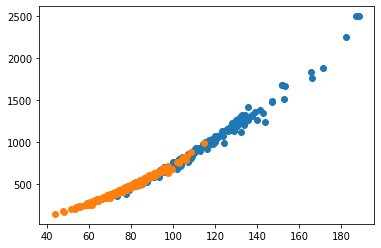

In [5]:
M = X[y == 'M', :]
B = X[y == 'B', :]
plt.scatter(M[:, 2], M[:, 3])
plt.scatter(B[:, 2], B[:, 3])
plt.show()

In [6]:
### PCA ###
M = X
K = M.shape[0]
M_c = M - M.mean(0)
M_z = M_c / M.std(0)

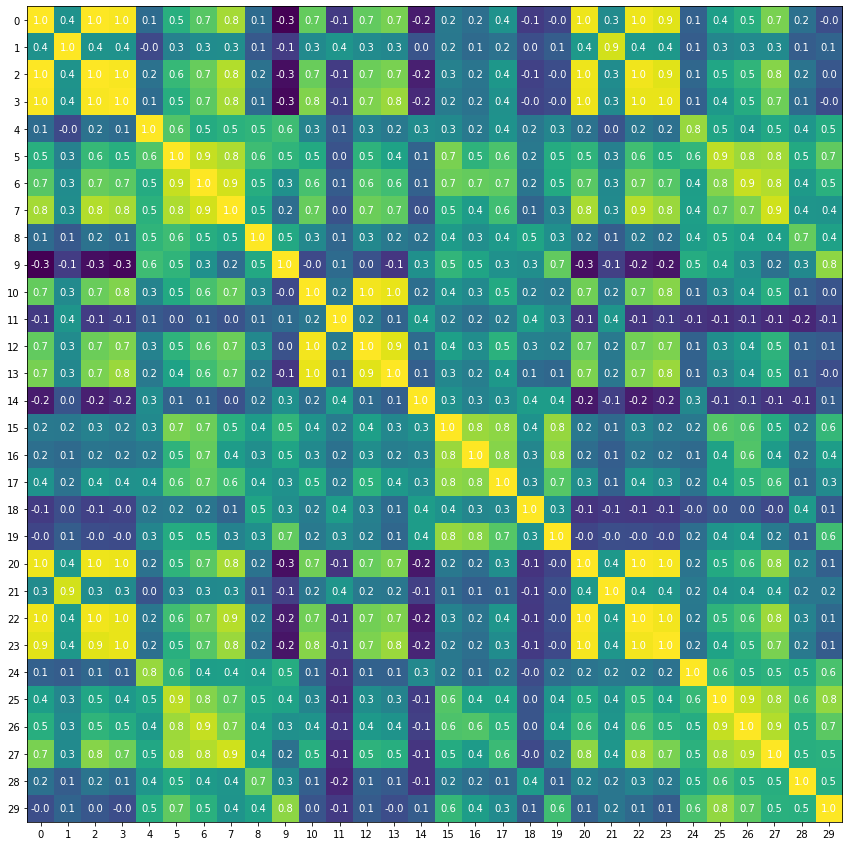

In [7]:
cov = (M_c.T @ M_c) / K
cor = (M_z.T @ M_z) / K
nb_features = cor.shape[0]

size = (15, 15)
fig, ax = plt.subplots(figsize=size)

ax.set_xticks(np.arange(nb_features))
ax.set_yticks(np.arange(nb_features))
heat = ax.imshow(cor, interpolation=None)
for i in range(nb_features):
    for j in range(nb_features):
        text = ax.text(j, i, np.around(cor[i, j], 1),
                       ha="center", va="center", color="w")
plt.show()

In [8]:
eigenval, eigenvec = np.linalg.eig(cor)

In [9]:
order = np.argsort(eigenval)[::-1]

In [10]:
P = eigenvec[:, order[:3]]
eigval = eigenval[order[:3]]
print([np.abs(x) / np.sum(eigenval) for x in eigval])

[0.4368475742901206, 0.19008226063442177, 0.0981457846486942]


In [11]:
Z = M_z @ P

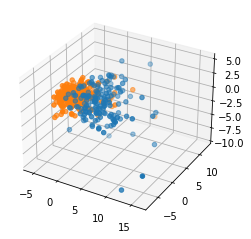

In [12]:
MZ = Z[y == 'M']
BZ = Z[y == 'B']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MZ[:, 0], MZ[:, 1], MZ[:, 2])
ax.scatter(BZ[:, 0], BZ[:, 1], BZ[:, 2])
plt.show()